In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Processing(path):
    """

    Clean the data by replacing the na_values by the mean 
    of the associated column. Take the path as argument.
    """
    data = pd.read_csv(path, na_values='?')
    for i in data.columns:
        for j in data[i]:
            if(isinstance(j,str)):
                l = [x for x in data[i].unique() if str(x) != 'nan']
                le = LabelEncoder()
                le.fit(l)
                y = le.transform(l)
                for k in range(len(l)):
                    data[i].replace(l[k],y[k], inplace = True)
    data.fillna(round(data.mean(), 2), inplace=True)
    data.to_csv("test.csv", sep=',', index=False)

Processing('ckd.csv')

df = pd.read_csv('test.csv',sep=',')

In [37]:
N=len(df.columns)
classe=df.columns[N-1]
df

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,80.0,1.020,1.0,0.0,0.81,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.20,1.0,1,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,0.81,1.0,0.0,0.0,148.04,...,38.0,6000.0,4.71,0.0,0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.00,1.0,0.0,0.0,423.00,...,31.0,7500.0,4.71,0.0,1,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.00,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.90,1.0,0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.00,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.60,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,140.00,...,47.0,6700.0,4.90,0.0,0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,75.00,...,54.0,7800.0,6.20,0.0,0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,100.00,...,49.0,6600.0,5.40,0.0,0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,114.00,...,51.0,7200.0,5.90,0.0,0,0.0,0.0,0.0,0.0,1


In [38]:
X = df.values[:,0:N-1]
# Preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

# Inertia, or relative variance, of each component. 
print("Relative variance (sum over ALL components would equal 1)")
print(pca.explained_variance_ratio_)

# Corresponding singular values
print("\n Corresponding singular values")
print(pca.singular_values_)

Relative variance (sum over ALL components would equal 1)
[0.29917701 0.07718724]

 Corresponding singular values
[53.59197008 27.22127012]


Text(0, 0.5, 'PC2')

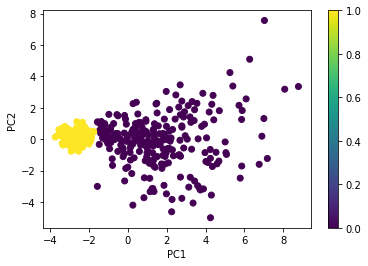

In [39]:
X_projected = pca.transform(X_scaled)


# Display each observation
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df.get(classe))

plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")